In [138]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
#import statsmodels.formula.api as smf
#import statsmodels.api as sm
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [139]:
entr = pd.read_csv("train.csv",usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
test1 = pd.read_csv("test.csv",usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
test2 = pd.read_csv("test.csv",usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [140]:
entr.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [141]:
entr.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
entr.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [143]:
unaTab = pd.crosstab(entr['SibSp'], entr['Survived'])
print(unaTab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [144]:
entr['Embarked'].fillna(entr['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(entr))
Embarked[entr['Embarked']== 'C'] = 1
Embarked[entr['Embarked']== 'Q'] = 2
Embarked[entr['Embarked']== 'S'] = 3
entr['Embarked'] = Embarked
entr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,3.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,3.0
3,1,1,female,35.0,1,0,53.1000,3.0
4,0,3,male,35.0,0,0,8.0500,3.0


In [145]:
sex = np.zeros(len(entr))
sex[entr['Sex']== 'male'] = 1
sex[entr['Sex']== 'female'] = 0
entr['Sex'] = sex
entr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,3.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,3.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,3.0


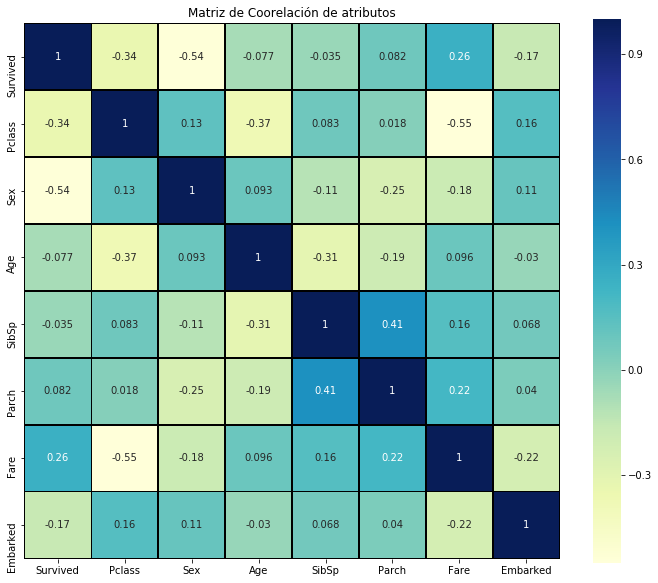

In [146]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Matriz de Coorelación de atributos')
sns.heatmap(entr.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [147]:
from sklearn.model_selection import cross_val_score, KFold

entr_y=entr['Survived']
entr_ft=entr.drop('Survived',axis=1)
kf = KFold(n_splits=10,random_state=1)
print(entr_ft.head(15))
print(entr_y.head(15))

    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0        3  1.0  22.0      1      0   7.2500       3.0
1        1  0.0  38.0      1      0  71.2833       1.0
2        3  0.0  26.0      0      0   7.9250       3.0
3        1  0.0  35.0      1      0  53.1000       3.0
4        3  1.0  35.0      0      0   8.0500       3.0
5        3  1.0   NaN      0      0   8.4583       2.0
6        1  1.0  54.0      0      0  51.8625       3.0
7        3  1.0   2.0      3      1  21.0750       3.0
8        3  0.0  27.0      0      2  11.1333       3.0
9        2  0.0  14.0      1      0  30.0708       1.0
10       3  0.0   4.0      1      1  16.7000       3.0
11       1  0.0  58.0      0      0  26.5500       3.0
12       3  1.0  20.0      0      0   8.0500       3.0
13       3  1.0  39.0      1      5  31.2750       3.0
14       3  0.0  14.0      0      0   7.8542       3.0
0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0


In [151]:
entr['Age'].fillna(entr['Age'].mean(),inplace=True)
edad = np.zeros(len(entr))
edad[entr['Age']<20] = 1
edad[(entr['Age']>=20)&(entr['Age']<60)] = 2
edad[(entr['Age']>=60)] = 3
entr['Age'] = edad
entr.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,1.0,1,0,7.2500,3.0
1,1,1,0.0,1.0,1,0,71.2833,1.0
2,1,3,0.0,1.0,0,0,7.9250,3.0
3,1,1,0.0,1.0,1,0,53.1000,3.0
4,0,3,1.0,1.0,0,0,8.0500,3.0
5,0,3,1.0,1.0,0,0,8.4583,2.0
6,0,1,1.0,1.0,0,0,51.8625,3.0
7,0,3,1.0,1.0,3,1,21.0750,3.0
8,1,3,0.0,1.0,0,2,11.1333,3.0
9,1,2,0.0,1.0,1,0,30.0708,1.0


In [153]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C = 30, gamma = 0.01)
svc.fit(entr_ft, entr_y) 

acc_SVM = cross_val_score(svc,entr_ft,entr_y,cv=kf)
print(acc_SVM.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [154]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
NN = NearestCentroid()
NN.fit(entr_ft, entr_y)
acc_NN = cross_val_score(NN,entr_ft,entr_y,cv=kf)
print(acc_NN.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').